### Import Libraries

In [1]:
# Import Libraries
import tweepy
##
import csv
import sys
import config
## Preprocessing
import pandas as pd
import re
from langdetect import detect
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
st = PorterStemmer()
from nltk.tokenize import word_tokenize 
from textblob import Word
from textblob import TextBlob
set(stopwords.words('english'))
from wordcloud import WordCloud
## Plt
import matplotlib.pyplot as plt
import seaborn as sns
# To sort dictionary values
import operator 

### Initialize Twitter API

In [2]:
# initialize api instance
consumer_key= config.consumer_key
consumer_secret= config.consumer_secret
access_token=config.access_token
access_token_secret =config.access_token_secret

### Connect to Twitter

In [3]:
#Connect to Twitter through the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit=True) 

### Create Function to collect Tweets

In [4]:
def getTweets(search_keyword, count):
    ''' collect tweets '''
    try: 
        # Create Blank Dataframe
        df_tweets = pd.DataFrame(pd.np.empty((0, 5)))
    
        for keyword in search_keyword:
            # Remove Retweets
            search_tag = keyword + " -filter:retweets"
            print('Searching tweets for: ', search_tag)

            fetched_tweets = tweepy.Cursor(api.search,
                            q=search_tag,
                            lang="en").items(count)
           # Add records to the dataframe
            df_tweets = df_tweets.append([[tweet.user.screen_name,tweet.user.name, tweet.user.location,keyword, tweet.text] for tweet in fetched_tweets])
        # Add columns
        df_tweets.columns = ['screen_name','user_name','location','keyword','text']
        # Retuen Data
        return(df_tweets)
    except Exception as e:
        print('Encountered Exception:', e)
        return None  

In [5]:
if __name__ == '__main__':
    # Setting up the keywords, hashtag or mentions we want to listen
    keywords = ['#Racism','#alllivesmatter']
    
    ### Call Function to collect tweets
    df_tweets = getTweets(keywords,1000)

Searching tweets for:  #Racism -filter:retweets
Searching tweets for:  #alllivesmatter -filter:retweets


In [6]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 5 columns):
screen_name    2000 non-null object
user_name      2000 non-null object
location       2000 non-null object
keyword        2000 non-null object
text           2000 non-null object
dtypes: object(5)
memory usage: 93.8+ KB


In [7]:
df_tweets.head()

,screen_name,user_name,location,keyword,text
0,Whee_ThisIsFun,UrMum,United States,#Racism,"@ACTBrigitte @VincentVi66 I’m wondering, does ..."
1,entwistletx,Faun deHenry,Global,#Racism,Report found historic #racism may mean people ...
2,InThePastLane,"Edward T. O'Donnell, Historian-at-Large","Holden, MA",#Racism,How the GOP missed its chance to embrace Marti...
3,ginger_consult2,jojo,,#Racism,Naturally. Will this solve #racism? https://t....
4,Lizreilly61,lovecreatedream,Southern California,#Racism,#GodWins #creation #commonsense #racism #ALLL...


### Data Preprocessing

In [8]:
# convert to lower case
df_tweets['clean_text'] = df_tweets['text'].str.lower()
# Remove punctuations
df_tweets['clean_text'] = df_tweets['clean_text'].str.replace('[^\w\s]',' ')
# Remove spaces in between words
df_tweets['clean_text'] = df_tweets['clean_text'].str.replace(' +', ' ')
# Remove Numbers
df_tweets['clean_text'] = df_tweets['clean_text'].str.replace('\d+', '')
# Remove trailing spaces
df_tweets['clean_text'] = df_tweets['clean_text'].str.strip()
# Remove URLS
df_tweets['clean_text'] = df_tweets['clean_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
# remove stop words
stop = stopwords.words('english')
stop.extend(["racism","alllivesmatter","amp","https","co","like","people","black","white"])
df_tweets['clean_text'] =  df_tweets['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop ))

# Remove Text Column
#del df_tweets['text']


In [9]:
df_tweets.head()

,screen_name,user_name,location,keyword,text,clean_text
0,Whee_ThisIsFun,UrMum,United States,#Racism,"@ACTBrigitte @VincentVi66 I’m wondering, does ...",actbrigitte vincentvi wondering estate nancy g...
1,entwistletx,Faun deHenry,Global,#Racism,Report found historic #racism may mean people ...,report found historic may mean discriminated c...
2,InThePastLane,"Edward T. O'Donnell, Historian-at-Large","Holden, MA",#Racism,How the GOP missed its chance to embrace Marti...,gop missed chance embrace martin luther king j...
3,ginger_consult2,jojo,,#Racism,Naturally. Will this solve #racism? https://t....,naturally solve uloselis
4,Lizreilly61,lovecreatedream,Southern California,#Racism,#GodWins #creation #commonsense #racism #ALLL...,godwins creation commonsense alllivesmater let...


### Words Frequency Distribution

In [10]:

# join the words in string
words = ' '.join(df_tweets['clean_text'])
words = words.split()
#print(words)
# create a empty dictionary
data = dict()
#  Get frequency for each words where word is the key and the count is the value
for word in (words):
    word = word.lower()
    data[word] = data.get(word, 0) + 1
# Sort the dictionary in reverse order to print first the most used terms    
dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True))

{'racist': 134,
 'blm': 109,
 'blacklivesmatter': 107,
 'lives': 80,
 'one': 71,
 'matter': 70,
 'us': 68,
 'police': 68,
 'say': 54,
 'time': 54,
 'need': 52,
 'race': 50,
 'stop': 50,
 'get': 49,
 'would': 49,
 'man': 48,
 'know': 48,
 'america': 45,
 'aunt': 43,
 'woman': 42,
 'right': 41,
 'change': 39,
 'love': 39,
 'think': 39,
 'jemima': 38,
 'world': 38,
 'problem': 38,
 'let': 37,
 'see': 37,
 'please': 35,
 'still': 34,
 'god': 34,
 'via': 34,
 'good': 34,
 'talk': 33,
 'country': 33,
 'want': 33,
 'go': 33,
 'life': 33,
 'trump': 32,
 'auntjemima': 32,
 'even': 32,
 'history': 32,
 'well': 31,
 'hate': 31,
 'yes': 31,
 'racial': 30,
 'saying': 30,
 'really': 29,
 'going': 29,
 'every': 29,
 'blacklivesmattters': 29,
 'many': 28,
 'thank': 28,
 'great': 28,
 'human': 28,
 'support': 28,
 'make': 27,
 'today': 26,
 'covid': 26,
 'systemic': 26,
 'everyone': 26,
 'blacks': 26,
 'way': 26,
 'must': 26,
 'un': 25,
 'never': 25,
 'new': 25,
 'real': 25,
 'u': 25,
 'bluelivesmatter

### Wordcloud

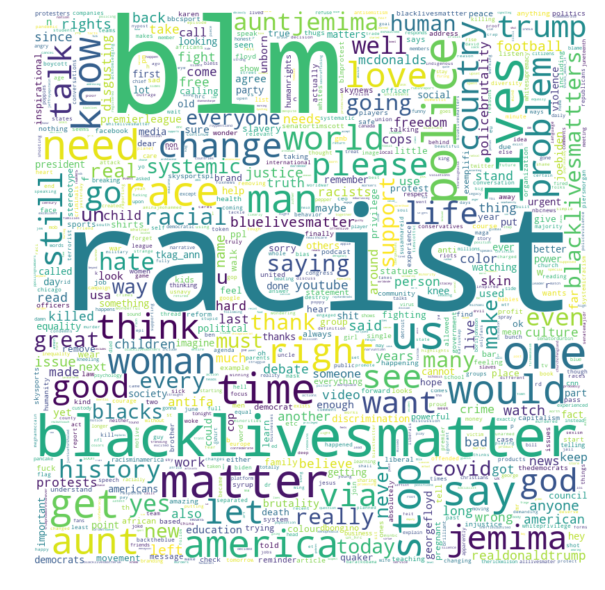

In [11]:
word_cloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 1000)
word_cloud.generate_from_frequencies(data)
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), edgecolor = 'k') 
plt.imshow(word_cloud,interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Sentiment Analysis

In [12]:

df_tweets['sentiment_score'] = [round(TextBlob(article).sentiment.polarity, 3)for article in df_tweets['clean_text']]
df_tweets['sentiment_category'] = ['positive' if score > 0 
                                    else 'negative' if score < 0 
                                    else 'neutral' 
                                    for score in df_tweets['sentiment_score']]

In [13]:
df_tweets.head()

,screen_name,user_name,location,keyword,text,clean_text,sentiment_score,sentiment_category
0,Whee_ThisIsFun,UrMum,United States,#Racism,"@ACTBrigitte @VincentVi66 I’m wondering, does ...",actbrigitte vincentvi wondering estate nancy g...,0.087,positive
1,entwistletx,Faun deHenry,Global,#Racism,Report found historic #racism may mean people ...,report found historic may mean discriminated c...,-0.104,negative
2,InThePastLane,"Edward T. O'Donnell, Historian-at-Large","Holden, MA",#Racism,How the GOP missed its chance to embrace Marti...,gop missed chance embrace martin luther king j...,0.000,neutral
3,ginger_consult2,jojo,,#Racism,Naturally. Will this solve #racism? https://t....,naturally solve uloselis,0.100,positive
4,Lizreilly61,lovecreatedream,Southern California,#Racism,#GodWins #creation #commonsense #racism #ALLL...,godwins creation commonsense alllivesmater let...,0.000,neutral


### Visualizations

/Users/oindrilasen/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


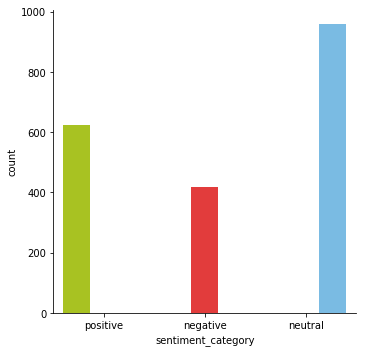

In [14]:

fc = sns.factorplot(x="sentiment_category", hue="sentiment_category", 
                    data=df_tweets, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [15]:
df_tweets.sentiment_category.value_counts()

neutral     958
positive    625
negative    417
Name: sentiment_category, dtype: int64

In [16]:
df_tweets[df_tweets['sentiment_category'] == 'positive'][["screen_name","user_name","text"]]

,screen_name,user_name,text
0,Whee_ThisIsFun,UrMum,"@ACTBrigitte @VincentVi66 I’m wondering, does ..."
3,ginger_consult2,jojo,Naturally. Will this solve #racism? https://t....
8,ruby_zajac,Ruby Zajac,Told by organiser the @no_evictions activists ...
9,unfoundation,United Nations Foundation,"""Enough is enough.""\n\nPowerful, poignant mess..."
13,MauraSaysSo,Maura,Thoughtful reminder to celebrate geographicall...
16,mdlnero,Colorado,Anyone who wants to still pretend racism isn't...
17,ARMY71430,Bulletproof Forever ⁷,So this is that racist girl..she is a future d...
20,DarrenWilkes,Darren Wilkes #FBPE,@SkyNews I hope all these racists make good on...
21,VBKerry,"Vanessa Kerry, MD MSc",Grateful for @drfolamay bringing her many tale...
22,letgoofmyfannie,Fercris Hart,"@MeliMels99 ""If you tell people they can’t tak..."


In [17]:
df_tweets[df_tweets['sentiment_category'] == 'positive']["text"][9]

'"Enough is enough."\n\nPowerful, poignant message from @UN Deputy Secretary-General @AminaJMohammed at today’s… https://t.co/u6THLkQgak'

In [18]:
df_tweets[df_tweets['sentiment_category'] == 'negative'][["screen_name","user_name","text"]]

,screen_name,user_name,text
1,entwistletx,Faun deHenry,Report found historic #racism may mean people ...
5,NickDuttonWI,Nick Dutton,There is no debate about the Confederacy or it...
6,RD_Muslims,الرادع المسلم,"#Hitler was evil, but honest, like #Trump. Som..."
14,Reebleceble,Reece Simpson,"Please watch this, it’s not too long but has a..."
26,PaulTheActor,Paul Cowling,WELL worth reading...\n\n#tulsaracemassacre #R...
27,Whee_ThisIsFun,UrMum,I wonder if the estate of Nancy Green was stil...
30,llcooljoe,Joey Classic 🌈✊🏿✊🏾✊🏽✊🏼✊🏻✊🏻🌈,@RubinReport I have to wonder how you feel abo...
32,BibiMilla,Bibi Milla,What are YOU doing about racism? Are you activ...
35,TouringTastebud,Chad & Stef,How are you having these tough conversations? ...
44,SaraPimental,Sara Pimental,It feels so frustrating when other white Chris...


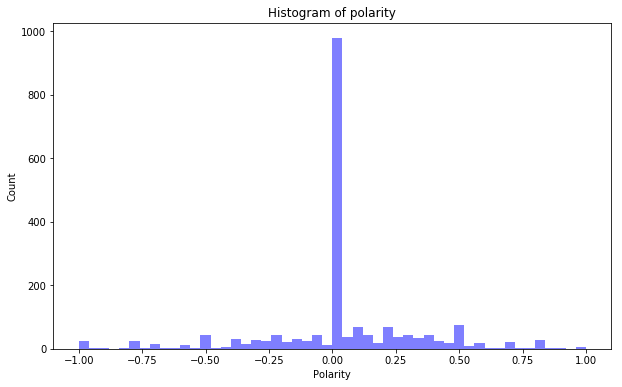

In [19]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df_tweets.sentiment_score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

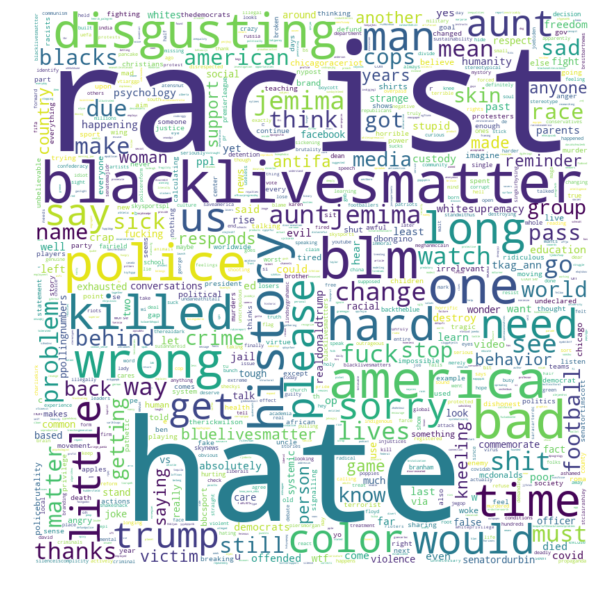

In [20]:
# join the words in string
words = ' '.join(df_tweets[df_tweets['sentiment_category'] == 'negative']["clean_text"])
words = words.split()
#print(words)
# create a empty dictionary
data = dict()
#  Get frequency for each words where word is the key and the count is the value
for word in (words):
    word = word.lower()
    data[word] = data.get(word, 0) + 1
# Sort the dictionary in reverse order to print first the most used terms    
dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True))
word_cloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 1000)
word_cloud.generate_from_frequencies(data)
# plot the WordCloud image                        
plt.figure(figsize = (10, 8), edgecolor = 'k') 
plt.imshow(word_cloud,interpolation = 'bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()